# Case study: How does a bike-share company navigate speedy success?

## Scenario


You are a junior data analyst working on the marketing analyst team at Cyclistic, a bike-share
company in Chicago. The director of marketing believes the company’s future success
depends on maximizing the number of annual memberships. Therefore, your team wants to
understand how casual riders and annual members use Cyclistic bikes differently. From these
insights, your team will design a new marketing strategy to convert casual riders into annual
members. But first, Cyclistic executives must approve your recommendations, so they must be
backed up with compelling data insights and professional data visualizations.

### Source :

[Click on this link for more information.](https://drive.google.com/file/d/13gzbC_igBNTzNf4TBIGn1tJsf6N-laM0/view?usp=drivesdk)

### Research Questions:


Three questions will guide the future marketing program:
    
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

### importing the required libraries.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the data

In [2]:
data_set1 = pd.read_csv('M:\\Internships\\ShadowFox\\2019.csv')
data_set2 = pd.read_csv('M:\\Internships\\ShadowFox\\2020.csv')

In [3]:
data_set1

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,21742443,2019-01-01 0:04:37,2019-01-01 0:11:07,2167,390,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0
1,21742444,2019-01-01 0:08:13,2019-01-01 0:15:34,4386,441,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0
2,21742445,2019-01-01 0:13:23,2019-01-01 0:27:12,1524,829,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0
3,21742446,2019-01-01 0:13:45,2019-01-01 0:43:28,252,"1,783.00",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0
4,21742447,2019-01-01 0:14:52,2019-01-01 0:20:56,1170,364,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0
...,...,...,...,...,...,...,...,...,...,...,...,...
365064,22178524,2019-03-31 23:51:32,2019-04-01 0:04:09,1501,757,38,Clark St & Lake St,29,Noble St & Milwaukee Ave,Subscriber,Male,1993.0
365065,22178525,2019-03-31 23:52:37,2019-03-31 23:58:09,3270,332,129,Blue Island Ave & 18th St,202,Halsted St & 18th St,Subscriber,Male,1992.0
365066,22178526,2019-03-31 23:52:38,2019-04-01 0:06:44,3584,846,283,LaSalle St & Jackson Blvd,273,Michigan Ave & 18th St,Subscriber,Male,1984.0
365067,22178527,2019-03-31 23:53:08,2019-03-31 23:56:06,4384,178,321,Wabash Ave & 9th St,39,Wabash Ave & Adams St,Subscriber,Male,1969.0


In [4]:
data_set2

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326.0,41.9665,-87.6884,41.9671,-87.6674,member
1,8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318.0,41.9616,-87.6660,41.9542,-87.6644,member
2,789F3C21E472CA96,docked_bike,2020-01-09 19:29:26,2020-01-09 19:32:17,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117.0,41.9401,-87.6455,41.9402,-87.6530,member
3,C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07,2020-01-06 16:25:56,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24.0,41.8846,-87.6319,41.8918,-87.6206,member
4,943BC3CBECCFD662,docked_bike,2020-01-30 08:37:16,2020-01-30 08:42:48,Clinton St & Lake St,66,Wells St & Hubbard St,212.0,41.8856,-87.6418,41.8899,-87.6343,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426882,ADDAA33CEBCAE733,docked_bike,2020-03-10 10:40:06,2020-03-10 10:40:07,HQ QR,675,HQ QR,675.0,41.8899,-87.6803,41.8899,-87.6803,casual
426883,82B10FA3994BC66A,docked_bike,2020-03-07 15:25:55,2020-03-07 16:14:03,Rush St & Superior St,161,Sheridan Rd & Irving Park Rd,240.0,41.8958,-87.6259,41.9542,-87.6544,member
426884,AA0D5AAA0B59C8AA,docked_bike,2020-03-01 13:12:38,2020-03-01 13:38:29,Clark St & Lincoln Ave,141,Ashland Ave & Division St,210.0,41.9157,-87.6346,41.9035,-87.6677,casual
426885,3296360A7BC20FB8,docked_bike,2020-03-07 18:02:45,2020-03-07 18:13:18,Franklin St & Illinois St,672,Stetson Ave & South Water St,264.0,41.8910,-87.6355,41.8868,-87.6223,member


### columns in two datasets

In [5]:
data_set1.columns

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')

In [6]:
data_set2.columns


Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

## Data Wrangling

### Rename columns to make them consistent with dataset1 (as this will be the supposed going-forward table design for Divvy)

In [7]:
new_column_names ={'ride_id':'trip_id','rideable_type':'bikeid','started_at' : 'start_time',
                 'ended_at':'end_time','start_station_name':'from_station_name','start_station_id':'from_station_id',
                 'end_station_name':'to_station_name','end_station_id':'to_station_id','member_casual':'usertype'}

In [8]:
data_set2.rename(columns = new_column_names,inplace =True)

In [9]:
data_set2.columns

Index(['trip_id', 'bikeid', 'start_time', 'end_time', 'from_station_name',
       'from_station_id', 'to_station_name', 'to_station_id', 'start_lat',
       'start_lng', 'end_lat', 'end_lng', 'usertype'],
      dtype='object')

### Inspect the dataframes and look for incongruencies

In [10]:
data_set1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365069 entries, 0 to 365068
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_id            365069 non-null  int64  
 1   start_time         365069 non-null  object 
 2   end_time           365069 non-null  object 
 3   bikeid             365069 non-null  int64  
 4   tripduration       365069 non-null  object 
 5   from_station_id    365069 non-null  int64  
 6   from_station_name  365069 non-null  object 
 7   to_station_id      365069 non-null  int64  
 8   to_station_name    365069 non-null  object 
 9   usertype           365069 non-null  object 
 10  gender             345358 non-null  object 
 11  birthyear          347046 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 33.4+ MB


In [11]:
data_set2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426887 entries, 0 to 426886
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_id            426887 non-null  object 
 1   bikeid             426887 non-null  object 
 2   start_time         426887 non-null  object 
 3   end_time           426887 non-null  object 
 4   from_station_name  426887 non-null  object 
 5   from_station_id    426887 non-null  int64  
 6   to_station_name    426886 non-null  object 
 7   to_station_id      426886 non-null  float64
 8   start_lat          426887 non-null  float64
 9   start_lng          426887 non-null  float64
 10  end_lat            426886 non-null  float64
 11  end_lng            426886 non-null  float64
 12  usertype           426887 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 42.3+ MB


In [12]:
"""Convert ride_id and rideable_type to str."""

'Convert ride_id and rideable_type to str.'

In [13]:
data_set1['trip_id'] = data_set1['trip_id'].astype('str')
data_set1['bikeid'] = data_set1['bikeid'].astype('str')

In [14]:
data_set1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365069 entries, 0 to 365068
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_id            365069 non-null  object 
 1   start_time         365069 non-null  object 
 2   end_time           365069 non-null  object 
 3   bikeid             365069 non-null  object 
 4   tripduration       365069 non-null  object 
 5   from_station_id    365069 non-null  int64  
 6   from_station_name  365069 non-null  object 
 7   to_station_id      365069 non-null  int64  
 8   to_station_name    365069 non-null  object 
 9   usertype           365069 non-null  object 
 10  gender             345358 non-null  object 
 11  birthyear          347046 non-null  float64
dtypes: float64(1), int64(2), object(9)
memory usage: 33.4+ MB


In [15]:
all_trips = pd.concat([data_set1,data_set2],axis =0 )
all_trips

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,start_lat,start_lng,end_lat,end_lng
0,21742443,2019-01-01 0:04:37,2019-01-01 0:11:07,2167,390,199,Wabash Ave & Grand Ave,84.0,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0,NaN,NaN,NaN,NaN
1,21742444,2019-01-01 0:08:13,2019-01-01 0:15:34,4386,441,44,State St & Randolph St,624.0,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0,NaN,NaN,NaN,NaN
2,21742445,2019-01-01 0:13:23,2019-01-01 0:27:12,1524,829,15,Racine Ave & 18th St,644.0,Western Ave & Fillmore St (*),Subscriber,Female,1994.0,NaN,NaN,NaN,NaN
3,21742446,2019-01-01 0:13:45,2019-01-01 0:43:28,252,"1,783.00",123,California Ave & Milwaukee Ave,176.0,Clark St & Elm St,Subscriber,Male,1993.0,NaN,NaN,NaN,NaN
4,21742447,2019-01-01 0:14:52,2019-01-01 0:20:56,1170,364,173,Mies van der Rohe Way & Chicago Ave,35.0,Streeter Dr & Grand Ave,Subscriber,Male,1994.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426882,ADDAA33CEBCAE733,2020-03-10 10:40:06,2020-03-10 10:40:07,docked_bike,NaN,675,HQ QR,675.0,HQ QR,casual,NaN,NaN,41.8899,-87.6803,41.8899,-87.6803
426883,82B10FA3994BC66A,2020-03-07 15:25:55,2020-03-07 16:14:03,docked_bike,NaN,161,Rush St & Superior St,240.0,Sheridan Rd & Irving Park Rd,member,NaN,NaN,41.8958,-87.6259,41.9542,-87.6544
426884,AA0D5AAA0B59C8AA,2020-03-01 13:12:38,2020-03-01 13:38:29,docked_bike,NaN,141,Clark St & Lincoln Ave,210.0,Ashland Ave & Division St,casual,NaN,NaN,41.9157,-87.6346,41.9035,-87.6677
426885,3296360A7BC20FB8,2020-03-07 18:02:45,2020-03-07 18:13:18,docked_bike,NaN,672,Franklin St & Illinois St,264.0,Stetson Ave & South Water St,member,NaN,NaN,41.8910,-87.6355,41.8868,-87.6223


In [16]:
all_trips.columns

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear', 'start_lat',
       'start_lng', 'end_lat', 'end_lng'],
      dtype='object')

In [17]:
all_trips.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,start_lat,start_lng,end_lat,end_lng
0,21742443,2019-01-01 0:04:37,2019-01-01 0:11:07,2167,390,199,Wabash Ave & Grand Ave,84.0,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0,NaN,NaN,NaN,NaN
1,21742444,2019-01-01 0:08:13,2019-01-01 0:15:34,4386,441,44,State St & Randolph St,624.0,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0,NaN,NaN,NaN,NaN
2,21742445,2019-01-01 0:13:23,2019-01-01 0:27:12,1524,829,15,Racine Ave & 18th St,644.0,Western Ave & Fillmore St (*),Subscriber,Female,1994.0,NaN,NaN,NaN,NaN
3,21742446,2019-01-01 0:13:45,2019-01-01 0:43:28,252,"1,783.00",123,California Ave & Milwaukee Ave,176.0,Clark St & Elm St,Subscriber,Male,1993.0,NaN,NaN,NaN,NaN
4,21742447,2019-01-01 0:14:52,2019-01-01 0:20:56,1170,364,173,Mies van der Rohe Way & Chicago Ave,35.0,Streeter Dr & Grand Ave,Subscriber,Male,1994.0,NaN,NaN,NaN,NaN


### Remove lat, long, birthyear, and gender fields as this data was dropped beginning in 2020

In [18]:
columns_to_drop = ['start_lat', 'start_lng', 'end_lat', 'end_lng', 'birthyear', 'gender', 'tripduration']


In [19]:
all_trips = all_trips.drop(columns=columns_to_drop)

In [20]:
all_trips

,trip_id,start_time,end_time,bikeid,from_station_id,from_station_name,to_station_id,to_station_name,usertype
0,21742443,2019-01-01 0:04:37,2019-01-01 0:11:07,2167,199,Wabash Ave & Grand Ave,84.0,Milwaukee Ave & Grand Ave,Subscriber
1,21742444,2019-01-01 0:08:13,2019-01-01 0:15:34,4386,44,State St & Randolph St,624.0,Dearborn St & Van Buren St (*),Subscriber
2,21742445,2019-01-01 0:13:23,2019-01-01 0:27:12,1524,15,Racine Ave & 18th St,644.0,Western Ave & Fillmore St (*),Subscriber
3,21742446,2019-01-01 0:13:45,2019-01-01 0:43:28,252,123,California Ave & Milwaukee Ave,176.0,Clark St & Elm St,Subscriber
4,21742447,2019-01-01 0:14:52,2019-01-01 0:20:56,1170,173,Mies van der Rohe Way & Chicago Ave,35.0,Streeter Dr & Grand Ave,Subscriber
...,...,...,...,...,...,...,...,...,...
426882,ADDAA33CEBCAE733,2020-03-10 10:40:06,2020-03-10 10:40:07,docked_bike,675,HQ QR,675.0,HQ QR,casual
426883,82B10FA3994BC66A,2020-03-07 15:25:55,2020-03-07 16:14:03,docked_bike,161,Rush St & Superior St,240.0,Sheridan Rd & Irving Park Rd,member
426884,AA0D5AAA0B59C8AA,2020-03-01 13:12:38,2020-03-01 13:38:29,docked_bike,141,Clark St & Lincoln Ave,210.0,Ashland Ave & Division St,casual
426885,3296360A7BC20FB8,2020-03-07 18:02:45,2020-03-07 18:13:18,docked_bike,672,Franklin St & Illinois St,264.0,Stetson Ave & South Water St,member


## CLEAN UP AND ADD DATA TO PREPARE FOR ANALYSIS

In [21]:
# Inspect the new table that has been created.
""" List of column names"""
all_trips.columns

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'from_station_id',
       'from_station_name', 'to_station_id', 'to_station_name', 'usertype'],
      dtype='object')

In [22]:
"""How many rows are in data frame?"""
all_trips.shape

(791956, 9)

In [23]:
"""See the first 5 rows of data frame."""
all_trips.head()

,trip_id,start_time,end_time,bikeid,from_station_id,from_station_name,to_station_id,to_station_name,usertype
0,21742443,2019-01-01 0:04:37,2019-01-01 0:11:07,2167,199,Wabash Ave & Grand Ave,84.0,Milwaukee Ave & Grand Ave,Subscriber
1,21742444,2019-01-01 0:08:13,2019-01-01 0:15:34,4386,44,State St & Randolph St,624.0,Dearborn St & Van Buren St (*),Subscriber
2,21742445,2019-01-01 0:13:23,2019-01-01 0:27:12,1524,15,Racine Ave & 18th St,644.0,Western Ave & Fillmore St (*),Subscriber
3,21742446,2019-01-01 0:13:45,2019-01-01 0:43:28,252,123,California Ave & Milwaukee Ave,176.0,Clark St & Elm St,Subscriber
4,21742447,2019-01-01 0:14:52,2019-01-01 0:20:56,1170,173,Mies van der Rohe Way & Chicago Ave,35.0,Streeter Dr & Grand Ave,Subscriber


In [24]:
"""See the last 5 rows of data frame."""
all_trips.tail()

,trip_id,start_time,end_time,bikeid,from_station_id,from_station_name,to_station_id,to_station_name,usertype
426882,ADDAA33CEBCAE733,2020-03-10 10:40:06,2020-03-10 10:40:07,docked_bike,675,HQ QR,675.0,HQ QR,casual
426883,82B10FA3994BC66A,2020-03-07 15:25:55,2020-03-07 16:14:03,docked_bike,161,Rush St & Superior St,240.0,Sheridan Rd & Irving Park Rd,member
426884,AA0D5AAA0B59C8AA,2020-03-01 13:12:38,2020-03-01 13:38:29,docked_bike,141,Clark St & Lincoln Ave,210.0,Ashland Ave & Division St,casual
426885,3296360A7BC20FB8,2020-03-07 18:02:45,2020-03-07 18:13:18,docked_bike,672,Franklin St & Illinois St,264.0,Stetson Ave & South Water St,member
426886,064EC7698E4FF9B3,2020-03-08 13:03:57,2020-03-08 13:32:27,docked_bike,110,Dearborn St & Erie St,85.0,Michigan Ave & Oak St,casual


In [25]:
"""See list of columns and data types """
all_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 791956 entries, 0 to 426886
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_id            791956 non-null  object 
 1   start_time         791956 non-null  object 
 2   end_time           791956 non-null  object 
 3   bikeid             791956 non-null  object 
 4   from_station_id    791956 non-null  int64  
 5   from_station_name  791956 non-null  object 
 6   to_station_id      791955 non-null  float64
 7   to_station_name    791955 non-null  object 
 8   usertype           791956 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 60.4+ MB


## There are few problems we need to fix it.




(1) In the "member_casual" column, there are two names for members ("member" and "Subscriber") and two names for casual riders ("Customer" and "casual"). We will need to consolidate that from four to two labels.

(2) The data can only be aggregated at the ride-level, which is too granular. We will want to add some additional columns of data -- such as day, month, year -- that provide additional opportunities to aggregate the data.

(3) We will want to add a calculated field for length of ride since the 2020Q1 data did not have the "tripduration" column. We will add "ride_length" to the entire dataframe for consistency.

(4) There are some rides where tripduration shows up as negative, including several hundred rides where Divvy took bikes out of circulation for Quality Control reasons. We will want to delete these rides.

In the "member_casual" column, replace "Subscriber" with "member" and "Customer" with "casual"

Before 2020, Divvy used different labels for these two types of riders ... we will want to make our dataframe consistent with their current nomenclature



### Begin by seeing how many observations fall under each usertype

In [26]:
all_trips[['start_time','usertype']]

,start_time,usertype
0,2019-01-01 0:04:37,Subscriber
1,2019-01-01 0:08:13,Subscriber
2,2019-01-01 0:13:23,Subscriber
3,2019-01-01 0:13:45,Subscriber
4,2019-01-01 0:14:52,Subscriber
...,...,...
426882,2020-03-10 10:40:06,casual
426883,2020-03-07 15:25:55,member
426884,2020-03-01 13:12:38,casual
426885,2020-03-07 18:02:45,member


In [27]:
all_trips['usertype'].value_counts()

member        378407
Subscriber    341906
casual         48480
Customer       23163
Name: usertype, dtype: int64

### Reassign to the desired values (we will go with the current 2020 labels)

In [28]:
all_trips['usertype'].replace({'Subscriber':'member','Customer':'casual'},inplace=True)

In [29]:
all_trips['usertype'].unique()

array(['member', 'casual'], dtype=object)

### Check to make sure the proper number of observations were reassigned

In [30]:
all_trips['usertype'].value_counts()

member    720313
casual     71643
Name: usertype, dtype: int64

### Add columns that list the date, month, day, and year of each ride


In [31]:
# Convert 'started_at' column to datetime and extract date attributes
all_trips['date'] = pd.to_datetime(all_trips['start_time']).dt.date
all_trips['month'] = pd.to_datetime(all_trips['date']).dt.month
all_trips['day'] = pd.to_datetime(all_trips['date']).dt.day
all_trips['year'] = pd.to_datetime(all_trips['date']).dt.year
all_trips['day_of_week'] = pd.to_datetime(all_trips['date']).dt.day_name()

In [32]:
all_trips

,trip_id,start_time,end_time,bikeid,from_station_id,from_station_name,to_station_id,to_station_name,usertype,date,month,day,year,day_of_week
0,21742443,2019-01-01 0:04:37,2019-01-01 0:11:07,2167,199,Wabash Ave & Grand Ave,84.0,Milwaukee Ave & Grand Ave,member,2019-01-01,1,1,2019,Tuesday
1,21742444,2019-01-01 0:08:13,2019-01-01 0:15:34,4386,44,State St & Randolph St,624.0,Dearborn St & Van Buren St (*),member,2019-01-01,1,1,2019,Tuesday
2,21742445,2019-01-01 0:13:23,2019-01-01 0:27:12,1524,15,Racine Ave & 18th St,644.0,Western Ave & Fillmore St (*),member,2019-01-01,1,1,2019,Tuesday
3,21742446,2019-01-01 0:13:45,2019-01-01 0:43:28,252,123,California Ave & Milwaukee Ave,176.0,Clark St & Elm St,member,2019-01-01,1,1,2019,Tuesday
4,21742447,2019-01-01 0:14:52,2019-01-01 0:20:56,1170,173,Mies van der Rohe Way & Chicago Ave,35.0,Streeter Dr & Grand Ave,member,2019-01-01,1,1,2019,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426882,ADDAA33CEBCAE733,2020-03-10 10:40:06,2020-03-10 10:40:07,docked_bike,675,HQ QR,675.0,HQ QR,casual,2020-03-10,3,10,2020,Tuesday
426883,82B10FA3994BC66A,2020-03-07 15:25:55,2020-03-07 16:14:03,docked_bike,161,Rush St & Superior St,240.0,Sheridan Rd & Irving Park Rd,member,2020-03-07,3,7,2020,Saturday
426884,AA0D5AAA0B59C8AA,2020-03-01 13:12:38,2020-03-01 13:38:29,docked_bike,141,Clark St & Lincoln Ave,210.0,Ashland Ave & Division St,casual,2020-03-01,3,1,2020,Sunday
426885,3296360A7BC20FB8,2020-03-07 18:02:45,2020-03-07 18:13:18,docked_bike,672,Franklin St & Illinois St,264.0,Stetson Ave & South Water St,member,2020-03-07,3,7,2020,Saturday


### Add a "ride_length" calculation to all_trips (in seconds)

In [33]:
all_trips.start_time = pd.to_datetime(all_trips.start_time)
all_trips.end_time = pd.to_datetime(all_trips.end_time)

In [34]:
all_trips['ride_length'] = (all_trips['end_time'] - all_trips['start_time']).dt.total_seconds()

In [35]:
all_trips.head()

,trip_id,start_time,end_time,bikeid,from_station_id,from_station_name,to_station_id,to_station_name,usertype,date,month,day,year,day_of_week,ride_length
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,199,Wabash Ave & Grand Ave,84.0,Milwaukee Ave & Grand Ave,member,2019-01-01,1,1,2019,Tuesday,390.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,44,State St & Randolph St,624.0,Dearborn St & Van Buren St (*),member,2019-01-01,1,1,2019,Tuesday,441.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,15,Racine Ave & 18th St,644.0,Western Ave & Fillmore St (*),member,2019-01-01,1,1,2019,Tuesday,829.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,123,California Ave & Milwaukee Ave,176.0,Clark St & Elm St,member,2019-01-01,1,1,2019,Tuesday,1783.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,173,Mies van der Rohe Way & Chicago Ave,35.0,Streeter Dr & Grand Ave,member,2019-01-01,1,1,2019,Tuesday,364.0


### Remove "bad" data

The dataframe includes a few hundred entries when bikes were taken out of docks and checked for ### quality by Divvy or ride_length was negative

We will create a new version of the dataframe (v2) since data is being removed

In [36]:
all_trips_v2 = all_trips[~((all_trips['from_station_name'] == "HQ QR") | (all_trips['ride_length'] < 0))]

In [37]:
all_trips_v2

,trip_id,start_time,end_time,bikeid,from_station_id,from_station_name,to_station_id,to_station_name,usertype,date,month,day,year,day_of_week,ride_length
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,199,Wabash Ave & Grand Ave,84.0,Milwaukee Ave & Grand Ave,member,2019-01-01,1,1,2019,Tuesday,390.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,44,State St & Randolph St,624.0,Dearborn St & Van Buren St (*),member,2019-01-01,1,1,2019,Tuesday,441.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,15,Racine Ave & 18th St,644.0,Western Ave & Fillmore St (*),member,2019-01-01,1,1,2019,Tuesday,829.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,123,California Ave & Milwaukee Ave,176.0,Clark St & Elm St,member,2019-01-01,1,1,2019,Tuesday,1783.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,173,Mies van der Rohe Way & Chicago Ave,35.0,Streeter Dr & Grand Ave,member,2019-01-01,1,1,2019,Tuesday,364.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426880,005D3BC2A3B33DDA,2020-03-12 07:32:25,2020-03-12 07:38:44,docked_bike,91,Clinton St & Washington Blvd,47.0,State St & Kinzie St,member,2020-03-12,3,12,2020,Thursday,379.0
426883,82B10FA3994BC66A,2020-03-07 15:25:55,2020-03-07 16:14:03,docked_bike,161,Rush St & Superior St,240.0,Sheridan Rd & Irving Park Rd,member,2020-03-07,3,7,2020,Saturday,2888.0
426884,AA0D5AAA0B59C8AA,2020-03-01 13:12:38,2020-03-01 13:38:29,docked_bike,141,Clark St & Lincoln Ave,210.0,Ashland Ave & Division St,casual,2020-03-01,3,1,2020,Sunday,1551.0
426885,3296360A7BC20FB8,2020-03-07 18:02:45,2020-03-07 18:13:18,docked_bike,672,Franklin St & Illinois St,264.0,Stetson Ave & South Water St,member,2020-03-07,3,7,2020,Saturday,633.0


## CONDUCT DESCRIPTIVE ANALYSIS

In [38]:
round(all_trips_v2.describe()).ride_length

count      788189.0
mean         1189.0
std         33292.0
min             1.0
25%           331.0
50%           539.0
75%           912.0
max      10632022.0
Name: ride_length, dtype: float64

### Compare members and casual users

In [39]:
"""Calculate mean ride length by usertype"""
all_trips_v2.groupby('usertype')['ride_length'].mean()

usertype
casual    5372.783874
member     795.252339
Name: ride_length, dtype: float64

In [40]:
"""Calculate median ride length by usertype"""
all_trips_v2.groupby('usertype')['ride_length'].median()

usertype
casual    1393.0
member     508.0
Name: ride_length, dtype: float64

In [41]:
"""Calculate max ride length by usertype"""
all_trips_v2.groupby('usertype')['ride_length'].max()

usertype
casual    10632022.0
member     6096428.0
Name: ride_length, dtype: float64

In [42]:
"""Calculate min ride length by usertype"""
all_trips_v2.groupby('usertype')['ride_length'].min()

usertype
casual    2.0
member    1.0
Name: ride_length, dtype: float64

### See the average ride time by each day for members vs casual users

In [43]:
all_trips_v2.groupby(['usertype', 'day_of_week'])['ride_length'].mean()

usertype  day_of_week
casual    Friday         6090.737302
          Monday         4752.050438
          Saturday       4950.770801
          Sunday         5061.304364
          Thursday       8451.666853
          Tuesday        4561.803857
          Wednesday      4480.372432
member    Friday          796.733789
          Monday          822.311202
          Saturday        974.072964
          Sunday          972.938336
          Thursday        707.209274
          Tuesday         769.441629
          Wednesday       711.983790
Name: ride_length, dtype: float64

In [44]:
round(all_trips_v2.groupby(['usertype', 'day_of_week'])['ride_length'].mean())

usertype  day_of_week
casual    Friday         6091.0
          Monday         4752.0
          Saturday       4951.0
          Sunday         5061.0
          Thursday       8452.0
          Tuesday        4562.0
          Wednesday      4480.0
member    Friday          797.0
          Monday          822.0
          Saturday        974.0
          Sunday          973.0
          Thursday        707.0
          Tuesday         769.0
          Wednesday       712.0
Name: ride_length, dtype: float64

### Notice that the days of the week are out of order. Let's fix that

In [45]:
day_of_week_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]


In [46]:
all_trips_v2['day_of_week'] = pd.Categorical(all_trips_v2['day_of_week'], categories=day_of_week_order, ordered=True)

C:\Users\manis\AppData\Local\Temp\ipykernel_3052\1083878683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_trips_v2['day_of_week'] = pd.Categorical(all_trips_v2['day_of_week'], categories=day_of_week_order, ordered=True)


### Now, let's run the average ride time by each day for members vs casual users

In [47]:
all_trips_v2.groupby(['usertype', 'day_of_week'])['ride_length'].mean()

usertype  day_of_week
casual    Sunday         5061.304364
          Monday         4752.050438
          Tuesday        4561.803857
          Wednesday      4480.372432
          Thursday       8451.666853
          Friday         6090.737302
          Saturday       4950.770801
member    Sunday          972.938336
          Monday          822.311202
          Tuesday         769.441629
          Wednesday       711.983790
          Thursday        707.209274
          Friday          796.733789
          Saturday        974.072964
Name: ride_length, dtype: float64

In [48]:
round(all_trips_v2.groupby(['usertype', 'day_of_week'])['ride_length'].mean())

usertype  day_of_week
casual    Sunday         5061.0
          Monday         4752.0
          Tuesday        4562.0
          Wednesday      4480.0
          Thursday       8452.0
          Friday         6091.0
          Saturday       4951.0
member    Sunday          973.0
          Monday          822.0
          Tuesday         769.0
          Wednesday       712.0
          Thursday        707.0
          Friday          797.0
          Saturday        974.0
Name: ride_length, dtype: float64

### analyze ridership data by type and weekday

In [49]:
result =all_trips_v2.groupby(['usertype', 'day_of_week']).agg(number_of_rides=('ride_length', 'count'),
    average_duration=('ride_length', 'mean')).reset_index()
result

,usertype,day_of_week,number_of_rides,average_duration
0,casual,Sunday,18652,5061.304364
1,casual,Monday,5591,4752.050438
2,casual,Tuesday,7311,4561.803857
3,casual,Wednesday,7690,4480.372432
4,casual,Thursday,7147,8451.666853
5,casual,Friday,8013,6090.737302
6,casual,Saturday,13473,4950.770801
7,member,Sunday,60197,972.938336
8,member,Monday,110430,822.311202
9,member,Tuesday,127974,769.441629


### Let's visualize the number of rides by rider type

In [50]:

# Sort the result by 'usertype' and 'day_of_week'
result = result.sort_values(by=['usertype', 'day_of_week']).round()
result

,usertype,day_of_week,number_of_rides,average_duration
0,casual,Sunday,18652,5061.0
1,casual,Monday,5591,4752.0
2,casual,Tuesday,7311,4562.0
3,casual,Wednesday,7690,4480.0
4,casual,Thursday,7147,8452.0
5,casual,Friday,8013,6091.0
6,casual,Saturday,13473,4951.0
7,member,Sunday,60197,973.0
8,member,Monday,110430,822.0
9,member,Tuesday,127974,769.0


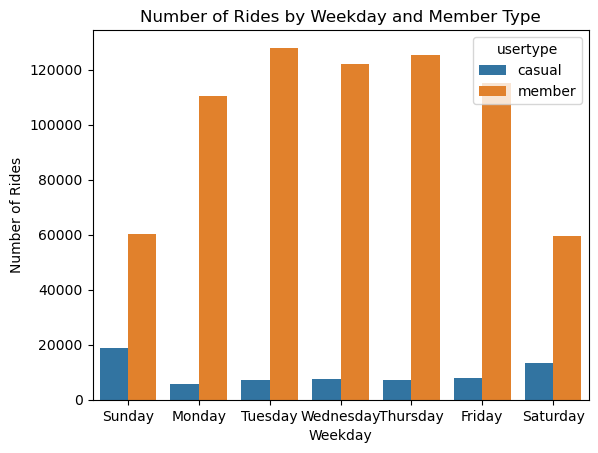

In [51]:
# Plotting using seaborn
sns.barplot(data=result, x='day_of_week', y='number_of_rides', hue='usertype', dodge=True)
# Add title and labels
plt.title('Number of Rides by Weekday and Member Type')
plt.xlabel('Weekday')
plt.ylabel('Number of Rides')

# Show plot
plt.show()

### Let's create a visualization for average duration

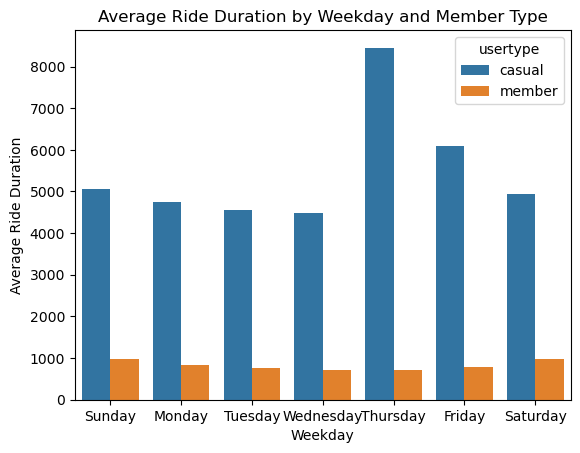

In [52]:
# Plotting using seaborn
sns.barplot(data=result, x='day_of_week', y='average_duration', hue='usertype', dodge=True)
# Add title and labels
plt.title('Average Ride Duration by Weekday and Member Type')
plt.xlabel('Weekday')
plt.ylabel('Average Ride Duration')

# Show plot
plt.show()

# Observations

### 1.How do annual members and casual riders use Cyclistic bikes differently?

Annual members use Cyclistic bikes more often than casual riders. They ride regularly, both for fun and commuting. Casual riders use the bikes less frequently, usually for occasional leisure or short trips.

### 2.Why would casual riders buy Cyclistic annual memberships?

Casual riders might want to buy annual memberships because they can enjoy unlimited rides for a fixed yearly fee. It's a good deal if they use the bikes often. Cyclistic can offer discounts or free trials to encourage casual riders to become members.

### 3.How can Cyclistic use digital media to influence casual riders to become members?

Cyclistic can use social media and email to show casual riders how convenient and cost-effective annual memberships are. They can target ads to casual riders and share stories from happy members. By using data to find potential members, they can make their marketing efforts more effective.

## Conclusion

In conclusion, by understanding the differences in bike usage between annual members and casual riders, Cyclistic can tailor its marketing strategies to effectively target each group. Encouraging casual riders to purchase annual memberships by highlighting the value of unlimited rides and offering incentives can lead to increased membership conversions. Utilizing digital media platforms to convey these messages and leveraging data analytics to optimize marketing efforts will be key in driving growth and profitability for Cyclistic.